In [1]:
import tensorflow as tf
tf.test.is_built_with_cuda()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

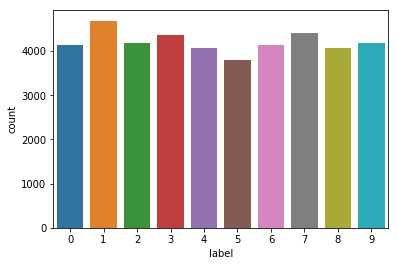

In [3]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
del train 
counts = sns.countplot(Y_train)

In [4]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [16]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5, 5), 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 16, kernel_size = (5, 5), 
                 activation ='relu'))
model.add(Conv2D(filters = 16, kernel_size = (1,1), 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          272       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
__________

In [18]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [19]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [21]:
model.fit(X_train,Y_train, batch_size = 256 , epochs = 20)

Epoch 1/20
37800/37800 [==============================] - 4s 104us/step - loss: 2.2655 - acc: 0.7493
Epoch 2/20
37800/37800 [==============================] - 4s 100us/step - loss: 0.1904 - acc: 0.9432
Epoch 3/20
37800/37800 [==============================] - 4s 98us/step - loss: 0.1176 - acc: 0.9636
Epoch 4/20
37800/37800 [==============================] - 4s 101us/step - loss: 0.0840 - acc: 0.9741
Epoch 5/20
37800/37800 [==============================] - 4s 98us/step - loss: 0.0632 - acc: 0.9797
Epoch 6/20
37800/37800 [==============================] - 4s 98us/step - loss: 0.0501 - acc: 0.9843
Epoch 7/20
37800/37800 [==============================] - 4s 98us/step - loss: 0.0442 - acc: 0.9860
Epoch 8/20
37800/37800 [==============================] - 4s 97us/step - loss: 0.0358 - acc: 0.9883
Epoch 9/20
37800/37800 [==============================] - 4s 97us/step - loss: 0.0303 - acc: 0.9901
Epoch 10/20
37800/37800 [==============================] - 4s 99us/step - loss: 0.0263 - acc: 0.9

In [22]:
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [23]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission2.csv",index=False)

In [24]:
model.save('weights.sav')